In [44]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# 1) Use the timestamp method(fn) to define a start time and end time for googles market and 
#    use pandas.io DataReader method to grab googles stock info
# 2.a) Plot the high and low values of googles stock for Sep, Oct and Nov 2015
# 2.b) How about adjusted close amt?
# 3) What can we say about the variance? Is the variance of the trading volume for google stable
#    over a certain given time? 
#   a) consider a rolling period of 75 days
#   b) What if we use the expanding method this time?
#   c) What if you change your window size (rolling period) to 300 days?
#   d) What if you lower your window size to 10 or 15 days?
# 4) a) On how many days were the closing price higher than the opening price?
#    b) On how many days were the opening price price higher than the closing price?
# 5) What is the mean monthly high value of our google stock? Can we plot it too?

In [46]:
!apt install pandas-datareader

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pandas-datareader


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import datetime

In [48]:
start = pd.Timestamp('2014-02-03')
end = pd.Timestamp('2016-11-13')

In [49]:
data = web.DataReader('F', 'yahoo', start, end)

In [50]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-02-03,15.00,14.40,15.00,14.55,92427200.0,10.396878
2014-02-04,14.93,14.45,14.57,14.87,55397500.0,10.625538
2014-02-05,14.93,14.50,14.93,14.73,45466500.0,10.525497
2014-02-06,14.85,14.53,14.57,14.85,47527100.0,10.611247
2014-02-07,15.13,14.94,14.94,14.97,38410500.0,10.696996


In [51]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-07,11.62,11.39,11.52,11.58,25120700.0,9.433235
2016-11-08,11.51,11.35,11.50,11.48,28497900.0,9.351772
2016-11-09,11.63,11.07,11.15,11.58,60625700.0,9.433235
2016-11-10,11.98,11.58,11.58,11.94,52756500.0,9.726494
2016-11-11,12.40,11.84,11.88,12.28,79259300.0,10.003464


In [52]:
# 2.a) Plot the high and low values of googles stock for Sep, Oct and Nov 2015

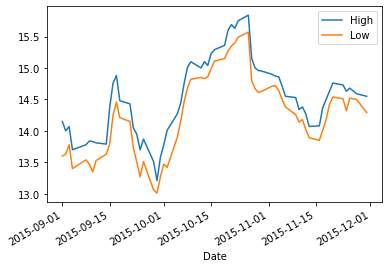

In [53]:
data['2015-09':'2015-11'][['High','Low']].plot()

In [54]:
# 2.b) How about adjusted close amt?

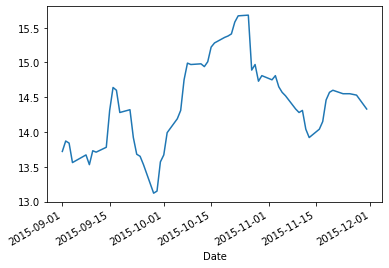

In [55]:
data['2015-09':'2015-11']['Close'].plot()

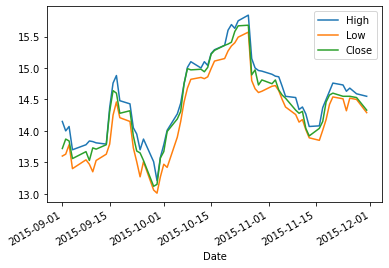

In [56]:
data['2015-09':'2015-11'][['High','Low','Close']].plot()

In [57]:

# 3) What can we say about the variance? Is the variance of the trading volume for google stable
#    over a certain given time? 
#   a) consider a rolling period of 75 days
#   b) What if we use the expanding method this time?
#   c) What if you change your window size (rolling period) to 300 days?
#   d) What if you lower your window size to 10 or 15 days?

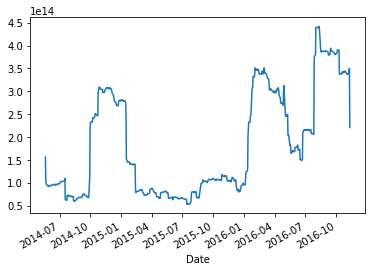

In [58]:
data.rolling(75).var()['Volume'].plot()

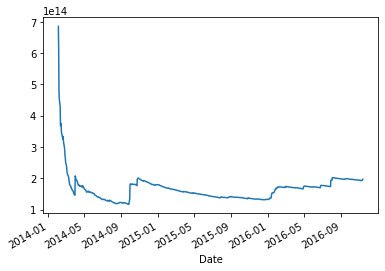

In [59]:
#   b) What if we use the expanding method this time?

data.expanding().var()['Volume'].plot()

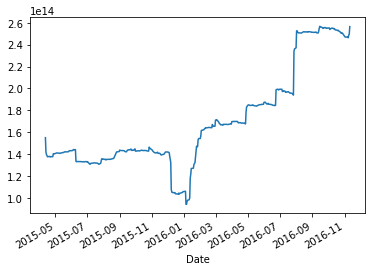

In [60]:
#   c) What if you change your window size (rolling period) to 300 days?

data.rolling(300).var()['Volume'].plot()

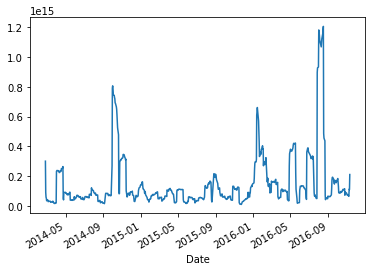

In [61]:
data.rolling(15).var()['Volume'].plot()

In [62]:
# 4) a) On how many days were the closing price higher than the opening price?
#    b) On how many days were the opening price price higher than the closing price?

len(data[data.Close > data.Open])


331

In [63]:
len(data[data.Open > data.Close])


345

In [64]:
len(data[data.Open == data.Close])

26

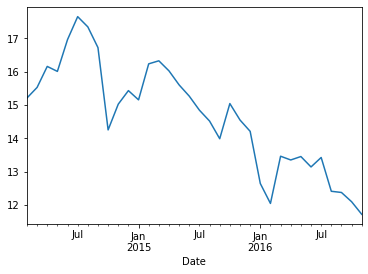

In [65]:
# 5) What is the mean monthly high value of our google stock? Can we plot it too?

data.resample('M').mean()['High'].plot()